In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uou-wa-6614-fall-2024-2/sample_submission.csv
/kaggle/input/uou-wa-6614-fall-2024-2/X_test.npy
/kaggle/input/uou-wa-6614-fall-2024-2/train.csv


In [6]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('/kaggle/input/uou-wa-6614-fall-2024-2/train.csv', index_col=0)
train_df

,Adj Close,Open,High,Low,Close,Volume
0,12.87,12.80,12.90,12.66,12.87,65420000
1,12.92,12.86,13.04,12.82,12.92,55018000
2,12.96,12.88,12.99,12.83,12.96,37484000
3,13.42,13.15,13.49,13.13,13.42,98200000
4,13.32,13.35,13.45,13.18,13.32,60214000
...,...,...,...,...,...,...
1505,67.20,67.30,69.80,65.35,67.20,144400000
1506,73.54,68.44,73.66,68.15,73.54,208236000
1507,73.08,72.71,73.45,69.52,73.08,194440000
1508,73.90,73.67,75.67,72.45,73.90,176580000


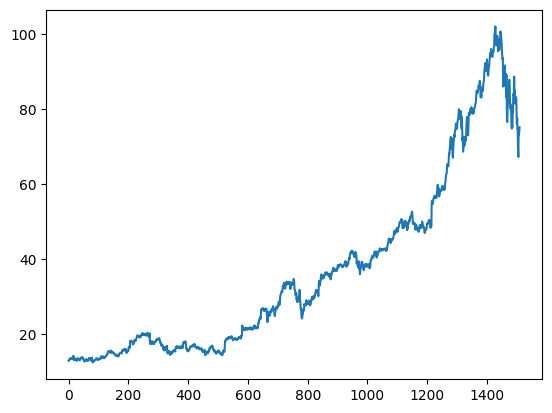

In [29]:
import matplotlib.pyplot as plt
plt.plot(train_df['Adj Close'])
plt.show()

In [10]:
ts_train = train_df.values
ts_train.shape

(1510, 6)

In [11]:
time_steps = 5
for_periods = 2

In [13]:
# create training data of s samples and t time steps
X_train = []
y_train = []
for i in range(time_steps, len(ts_train)-1):
    X_train.append(ts_train[i-time_steps:i,:])
    y_train.append(ts_train[i:i+for_periods,0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)

(1504, 5, 6) (1504, 2)


In [26]:
train_df.iloc[:7,:]

,Adj Close,Open,High,Low,Close,Volume
0,12.87,12.80,12.90,12.66,12.87,65420000
1,12.92,12.86,13.04,12.82,12.92,55018000
2,12.96,12.88,12.99,12.83,12.96,37484000
3,13.42,13.15,13.49,13.13,13.42,98200000
4,13.32,13.35,13.45,13.18,13.32,60214000
5,13.32,13.41,13.48,13.27,13.32,45312000
6,13.27,13.43,13.44,13.11,13.27,57268000


In [27]:
X_train[0, :, :]

array([[1.2870e+01, 1.2800e+01, 1.2900e+01, 1.2660e+01, 1.2870e+01,
        6.5420e+07],
       [1.2920e+01, 1.2860e+01, 1.3040e+01, 1.2820e+01, 1.2920e+01,
        5.5018e+07],
       [1.2960e+01, 1.2880e+01, 1.2990e+01, 1.2830e+01, 1.2960e+01,
        3.7484e+07],
       [1.3420e+01, 1.3150e+01, 1.3490e+01, 1.3130e+01, 1.3420e+01,
        9.8200e+07],
       [1.3320e+01, 1.3350e+01, 1.3450e+01, 1.3180e+01, 1.3320e+01,
        6.0214e+07]])

In [21]:
y_train[0, :]

array([13.32, 13.27])

In [15]:
X_test = np.load('/kaggle/input/uou-wa-6614-fall-2024-2/X_test.npy')
X_test.shape

(245, 5, 6)